In [34]:
import numpy as np
import scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [35]:
frequencies = np.array([0.05,0.05,0.05,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1,1,1,1.1,1.1,1.1,1.2,1.2,1.2,1.3,1.3,1.3,1.4,1.4,1.4,1.5,1.5,1.5,1.6,1.6,1.6,1.7,1.7,1.7,1.8,1.8,1.8,1.9,1.9,1.9,2,2,2,2.1,2.1,2.1,2.2,2.2,2.2,2.3,2.3,2.3,2.4,2.4,2.4,2.5,2.5,2.5,2.6,2.6,2.6,2.7,2.7,2.7,2.8,2.8,2.8,2.9,2.9,2.9,3,3,3,3.1,3.1,3.1,3.2,3.2,3.2,3.3,3.3,3.3,3.4,3.4,3.4,3.5,3.5,3.5,3.6,3.6,3.6,3.7,3.7,3.7,3.8,3.8,3.8,3.9,3.9,3.9,4,4,4,4.1,4.1,4.1,4.2,4.2,4.2,4.3,4.3,4.3,4.4,4.4,4.4,4.5,4.5,4.5,4.6,4.6,4.6,4.7,4.7,4.7,4.8,4.8,4.8,4.9,4.9,4.9,5,5,5,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.3,5.4,5.4,5.4,5.5,5.5,5.5,5.6,5.6,5.6,5.7,5.7,5.7,5.8,5.8,5.8,5.9,5.9,5.9,6,6,6,6.1,6.1,6.1,6.2,6.2,6.2,6.3,6.3,6.3,6.4,6.4,6.4,6.5,6.5,6.5,6.6,6.6,6.6,6.7,6.7,6.7,6.8,6.8,6.8,6.9,6.9,6.9,7,7,7,7.1,7.1,7.1,7.2,7.2,7.2,7.3,7.3,7.3,7.4,7.4,7.4,7.5,7.5,7.5,7.6,7.6,7.6,7.7,7.7,7.7,7.8,7.8,7.8,7.9,7.9,7.9,8,8,8,8.1,8.1,8.1,8.2,8.2,8.2,8.3,8.3,8.3,8.4,8.4,8.4,8.5,8.5,8.5,8.6,8.6,8.6,8.7,8.7,8.7,8.8,8.8,8.8,8.9,8.9,8.9,9,9,9,9.1,9.1,9.1,9.2,9.2,9.2,9.3,9.3,9.3,9.4,9.4,9.4,9.5,9.5,9.5,9.6,9.6,9.6,9.7,9.7,9.7,9.8,9.8,9.8,9.9,9.9,9.9,10,10,10,10.1,10.1,10.1,10.2,10.2,10.2,10.3,10.3,10.3,10.4,10.4,10.4,10.5,10.5,10.5,10.6,10.6,10.6,10.7,10.7,10.7,10.8,10.8,10.8,10.9,10.9,10.9,11,11,11,11.1,11.1,11.1,11.2,11.2,11.2,11.3,11.3,11.3,11.4,11.4,11.4,11.5,11.5,11.5,11.6,11.6,11.6,11.7,11.7,11.7,11.8,11.8,11.8,11.9,11.9,11.9,12,12,12,12.1,12.1,12.1,12.2,12.2,12.2,12.3,12.3,12.3,12.4,12.4,12.4,12.5,12.5,12.5,12.6,12.6,12.6,12.7,12.7,12.7,12.8,12.8,12.8,12.9,12.9,12.9,13,13,13,13.1,13.1,13.1,13.2,13.2,13.2,13.3,13.3,13.3,13.4,13.4,13.4,13.5,13.5,13.5,13.6,13.6,13.6,13.7,13.7,13.7,13.8,13.8,13.8,13.9,13.9,13.9,14,14,14,14.1,14.1,14.1,14.2,14.2,14.2,14.3,14.3,14.3,14.4,14.4,14.4,14.5,14.5,14.5,14.6,14.6,14.6,14.7,14.7,14.7,14.8,14.8,14.8,14.9,14.9,14.9,15,15,15,15.1,15.1,15.1,15.2,15.2,15.2,15.3,15.3,15.3,15.4,15.4,15.4,15.5,15.5,15.5,15.6,15.6,15.6,15.7,15.7,15.7,15.8,15.8,15.8,15.9,15.9,15.9,16,16,16,16.1,16.1,16.1,16.2,16.2,16.2,16.3,16.3,16.3,16.4,16.4,16.4,16.5,16.5,16.5,16.6,16.6,16.6,16.7,16.7,16.7,16.8,16.8,16.8,16.9,16.9,16.9,17,17,17,17.1,17.1,17.1,17.2,17.2,17.2,17.3,17.3,17.3,17.4,17.4,17.4,17.5,17.5,17.5,17.6,17.6,17.6,17.7,17.7,17.7,17.8,17.8,17.8,17.9,17.9,17.9,18,18,18])
meanfreq = np.mean(frequencies.reshape(-1, 3), axis=1)

In [36]:
MagS11 = np.array([0.0033,0.0033,0.0034,0.0033,0.0033,0.0033,0.0048,0.0047,0.0048,0.0066,0.0066,0.0067,0.0074,0.0075,0.0075,0.0071,0.0071,0.0071,0.0082,0.0082,0.0083,0.009,0.0091,0.0092,0.0093,0.0094,0.0095,0.0092,0.0092,0.0092,0.0095,0.0095,0.0095,0.0105,0.0105,0.0105,0.0106,0.0106,0.0107,0.011,0.0109,0.011,0.0121,0.0121,0.0122,0.0122,0.0122,0.0122,0.0135,0.0134,0.0134,0.0141,0.0141,0.0141,0.0155,0.0156,0.0155,0.0157,0.0157,0.0156,0.0164,0.0164,0.0162,0.0167,0.0167,0.0165,0.018,0.0179,0.0178,0.0176,0.0176,0.0174,0.0172,0.0172,0.017,0.0177,0.0176,0.0175,0.0169,0.0168,0.0166,0.0171,0.017,0.0167,0.0173,0.0172,0.0169,0.0176,0.0175,0.0173,0.0168,0.0166,0.0164,0.0171,0.017,0.0168,0.0169,0.0168,0.0166,0.016,0.0159,0.0157,0.016,0.0158,0.0155,0.0168,0.0166,0.0164,0.0173,0.0171,0.0169,0.0167,0.0165,0.0163,0.017,0.0168,0.0166,0.0182,0.0181,0.018,0.0191,0.019,0.0189,0.0182,0.0181,0.018,0.0197,0.0196,0.0196,0.0198,0.0198,0.0198,0.0197,0.0196,0.0195,0.0197,0.0197,0.0196,0.0218,0.0218,0.0218,0.0219,0.0219,0.0219,0.0226,0.0227,0.0227,0.0246,0.0247,0.0248,0.0251,0.0253,0.0255,0.0268,0.0269,0.0271,0.0286,0.0288,0.029,0.0304,0.0306,0.0308,0.0299,0.0301,0.0303,0.0317,0.032,0.0322,0.0331,0.0335,0.0339,0.0343,0.0348,0.0353,0.0345,0.0351,0.0356,0.0366,0.0373,0.038,0.0378,0.0387,0.0395,0.0382,0.0392,0.0401,0.0386,0.0397,0.0408,0.0404,0.0416,0.043,0.0413,0.0424,0.0437,0.041,0.0421,0.0432,0.0431,0.0441,0.0448,0.0429,0.0436,0.0438,0.0429,0.0433,0.0431,0.0445,0.0446,0.0442,0.0464,0.0462,0.0456,0.0467,0.0461,0.0456,0.0485,0.0477,0.0472,0.051,0.05,0.0496,0.0516,0.0505,0.0501,0.0509,0.0495,0.0491,0.0529,0.0514,0.0511,0.0548,0.0533,0.0531,0.0548,0.0532,0.0529,0.0556,0.0541,0.0537,0.0575,0.056,0.0558,0.058,0.0565,0.0561,0.0588,0.0573,0.0568,0.0609,0.0595,0.0591,0.0609,0.0596,0.059,0.0603,0.0591,0.0585,0.0608,0.0597,0.059,0.0621,0.0612,0.0606,0.0606,0.0599,0.0591,0.0609,0.0603,0.0594,0.063,0.0626,0.0619,0.0628,0.0627,0.0619,0.0614,0.0613,0.0605,0.0621,0.0622,0.0615,0.0632,0.0636,0.0629,0.0615,0.062,0.0612,0.0615,0.0621,0.0613,0.0636,0.0645,0.064,0.0624,0.0635,0.0631,0.0595,0.0607,0.0602,0.0612,0.0625,0.0624,0.0609,0.0624,0.0625,0.059,0.0605,0.0608,0.0596,0.0612,0.0618,0.0617,0.0634,0.0645,0.0599,0.0615,0.0629,0.0577,0.0592,0.0607,0.0598,0.0613,0.0629,0.0582,0.0596,0.0609,0.0538,0.055,0.0557,0.0542,0.0554,0.0559,0.0558,0.0569,0.0574,0.0521,0.053,0.0532,0.0511,0.0519,0.0521,0.054,0.0548,0.0553,0.0534,0.0541,0.0547,0.0509,0.0514,0.0519,0.051,0.0515,0.0522,0.0522,0.0527,0.0534,0.049,0.0491,0.0499,0.0498,0.0501,0.051,0.0523,0.0527,0.0538,0.0514,0.0516,0.0527,0.0482,0.0482,0.0491,0.0533,0.0534,0.0544,0.0541,0.0541,0.0552,0.0512,0.0512,0.0521,0.0517,0.0517,0.0526,0.0551,0.0551,0.0561,0.0518,0.0517,0.0522,0.0507,0.0505,0.0509,0.0551,0.055,0.0554,0.0569,0.0568,0.0568,0.0541,0.0539,0.0535,0.058,0.0579,0.0573,0.0632,0.063,0.0621,0.0634,0.0631,0.0615,0.0663,0.0661,0.0643,0.0735,0.0734,0.0714,0.0754,0.0752,0.0728,0.0766,0.0762,0.0735,0.0825,0.0822,0.0794,0.0872,0.0868,0.0842,0.0848,0.0843,0.0817,0.09,0.0895,0.0874,0.0963,0.0959,0.0946,0.0978,0.0973,0.0966,0.0958,0.0952,0.0946,0.1027,0.1022,0.1021,0.1026,0.102,0.1023,0.0995,0.0989,0.0991,0.1022,0.1016,0.1019,0.1095,0.109,0.1097,0.1074,0.1068,0.1073,0.1056,0.1049,0.1052,0.1105,0.1101,0.1106,0.1124,0.1119,0.1124,0.1094,0.1088,0.1088,0.1125,0.1119,0.1117,0.1158,0.1152,0.1152,0.1116,0.1109,0.1107,0.1114,0.1107,0.1107,0.1145,0.1139,0.1145,0.1115,0.1109,0.1121,0.107,0.1062,0.1075,0.1092,0.1084,0.1101,0.1087,0.1079,0.1103,0.0989,0.0979,0.1006,0.0987,0.0978,0.1007,0.1044,0.1037,0.107,0.1005,0.0997,0.1028,0.0951,0.0942,0.0969,0.1005,0.0998,0.1026,0.0992,0.0984,0.1008,0.0912,0.0902,0.0921,0.092,0.0911,0.0928,0.0931,0.0923,0.0936,0.087,0.0861,0.0866,0.088,0.0871,0.0875,0.0941,0.0935,0.0941,0.0876,0.087,0.0874])
meanmag = np.mean(MagS11.reshape(-1, 3), axis=1)

In [37]:
f = interp1d(meanfreq,meanmag,kind="cubic")
nx = np.arange(1,18,1)
g = interp1d(nx,f(nx),kind="cubic")

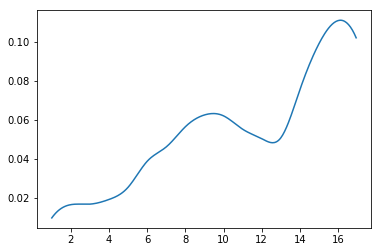

In [38]:
nx2 = np.arange(1,17,0.05)
plt.plot(nx2,g(nx2))
plt.show()